In [1]:
from terminal_optimization import objects
from terminal_optimization import defaults
from terminal_optimization import system

# 0. Prepare inputs

In [2]:
startyear = 2019
lifecycle = 20

## 0.1 Generate demand forecast scenario

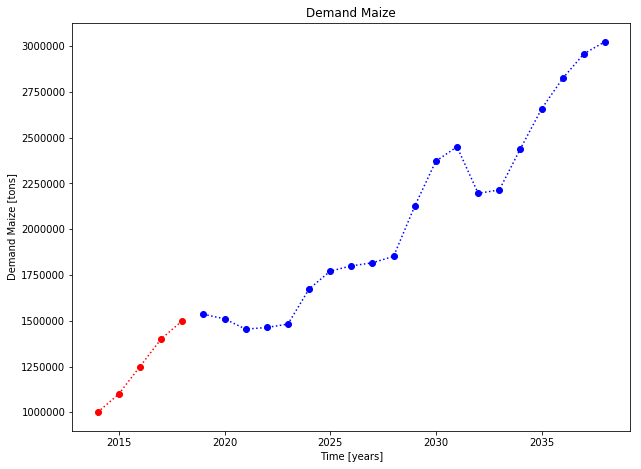

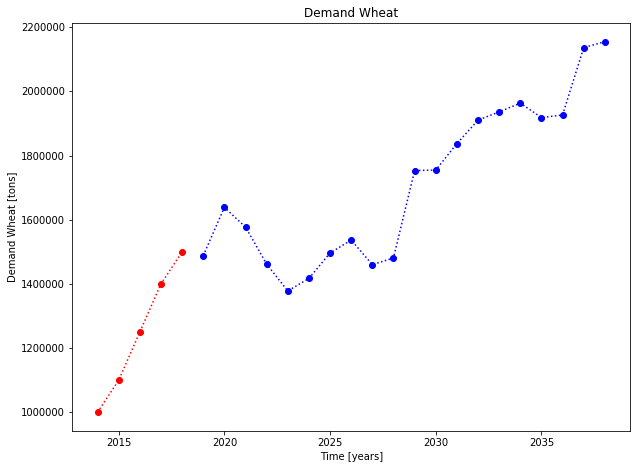

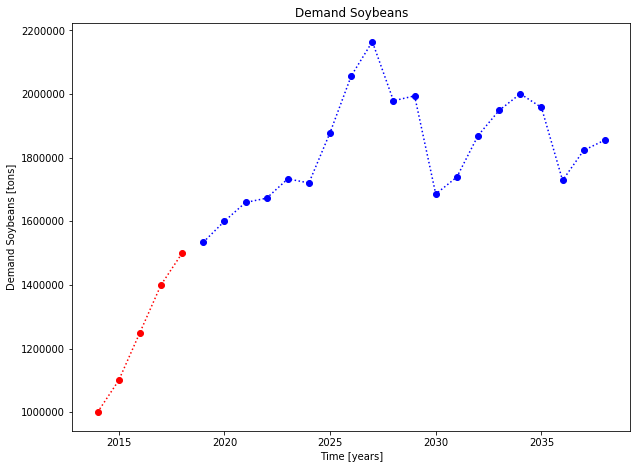

In [3]:
# instantiate a commodity object
maize = objects.Commodity(**defaults.maize_data)
wheat = objects.Commodity(**defaults.wheat_data)
soybeans = objects.Commodity(**defaults.soybean_data)

# create a future througput scenario
maize.scenario_random(startyear = startyear, lifecycle = lifecycle)
wheat.scenario_random(startyear = startyear, lifecycle = lifecycle)
soybeans.scenario_random(startyear = startyear, lifecycle = lifecycle)

demand = [maize, wheat, soybeans]

# plot scenarios 
if True:
    maize.plot_demand()
    wheat.plot_demand()
    soybeans.plot_demand()

## 0.2 Generate vessels

In [4]:
# instantiate vessels
handysize = objects.Vessel(**defaults.handysize_data)
handymax = objects.Vessel(**defaults.handymax_data)
panamax = objects.Vessel(**defaults.panamax_data)

vessels = [handysize, handymax, panamax]

# 1. Instatiate terminal system

In [5]:
Terminal = system.System(startyear = startyear, lifecycle = lifecycle, elements = demand + vessels, debug=False,
                         crane_type_defaults=defaults.mobile_crane_data, storage_type_defaults=defaults.silo_data)

# 2. Start simulation
Develop terminal given the throughput scenario and investment triggers implemented

In [6]:
Terminal.simulate()

In [7]:
data = defaults.quay_conveyor_data
data['type']

'quay_conveyor'

## Report all elements

In [8]:
if Terminal.debug:
    for element in Terminal.elements:
        print("")
        print(element.name)
        print("")
        print(element.__dict__)

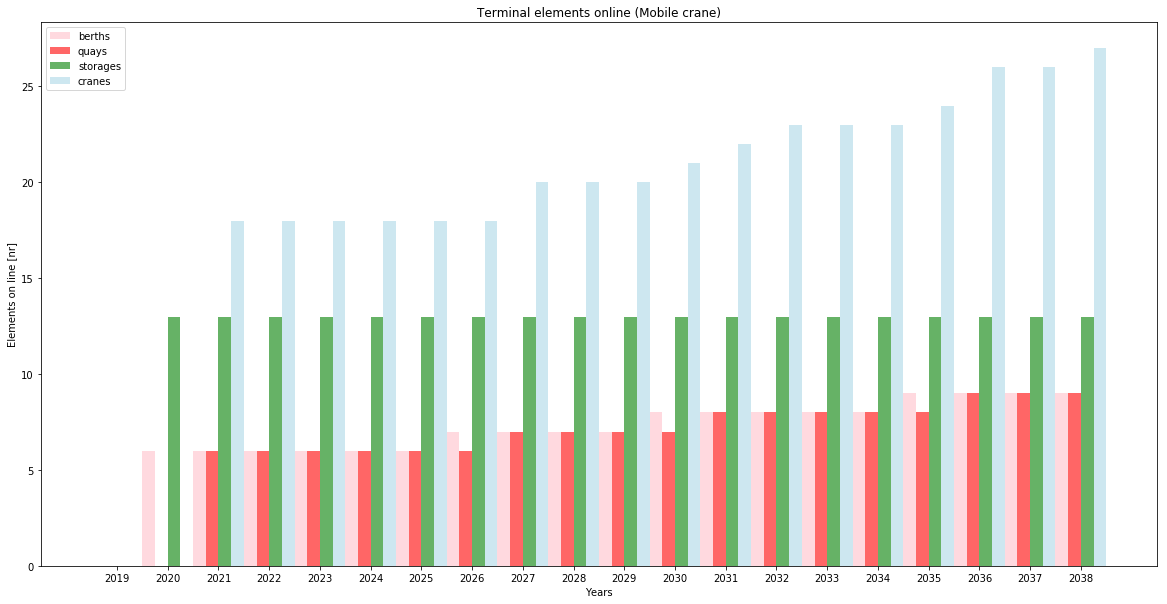

In [9]:
Terminal.terminal_elements_plot()

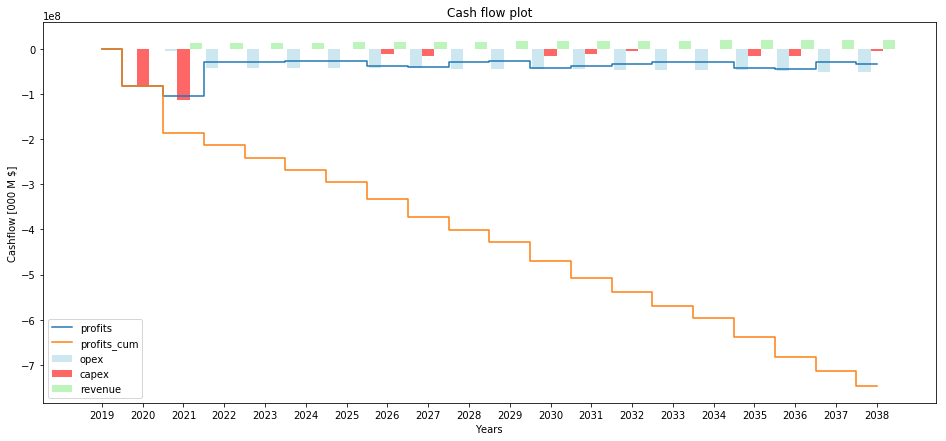

In [10]:
Terminal.cashflow_plot()

## SandBox

In [11]:
Terminal.NPV()

PV: [ 0.00000000e+00 -8.13209600e+07 -1.04315100e+08 -2.80444290e+07
 -2.80567830e+07 -2.74041960e+07 -2.63988750e+07 -3.67945500e+07
 -4.05854610e+07 -2.81483632e+07 -2.64623302e+07 -4.16074682e+07
 -3.82094478e+07 -3.22427605e+07 -2.89762832e+07 -2.80646852e+07
 -4.26352332e+07 -4.38574123e+07 -2.96864665e+07 -3.31566215e+07]
NPV: -745967425.8908163


## Add a supply chain graph
The graph should be useable to detect if all elements of the supplychain are in place. 
Only when a path through the supply chain is available can revenue be obtained. 
This is still an experimental functionality and not yet fully implemented. 

In [12]:
# *** specify supply chain logic
# 1. create object types
quay = objects.Quay_wall(**defaults.quay_wall_data)
berth = objects.Berth(**defaults.berth_data)
crane = objects.Cyclic_Unloader(**defaults.gantry_crane_data)
screw = objects.Continuous_Unloader(**defaults.continuous_screw_data)
conveyor1 = objects.Conveyor(**defaults.quay_conveyor_data)
storage = objects.Storage(**defaults.silo_data)
conveyor2 = objects.Conveyor(**defaults.hinterland_conveyor_data)
unloading_station = objects.Unloading_station(**defaults.hinterland_station_data)

# 2. specify nodes and edges
nodes = [quay, berth, crane, screw, conveyor1, storage, conveyor2, unloading_station]
edges = [[quay, berth],
         [berth, crane],
         [crane, screw],
         [screw, conveyor1],
         [conveyor1, storage],
         [storage, conveyor2],
         [conveyor2, unloading_station]]

# 3. invoke the supply_chain method
Terminal.supply_chain(nodes, edges)

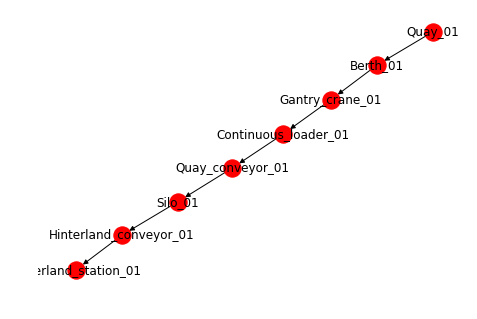

In [13]:
Terminal.plot_system()